In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





In [ ]:
df = pd.read_csv('multiple_regression_dataset.csv')
df.head()

,TV_Advertising,Radio_Advertising,Online_Advertising,Sales
0,118.62,71.33,44.07,13.65
1,285.71,55.93,90.45,38.08
2,222.28,34.41,133.48,24.73
3,183.61,82.31,115.19,25.54
4,55.25,70.05,124.85,26.57


In [ ]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
pred_poly = poly_model.predict(X_test_poly)

In [ ]:
# Support Vector Regression
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)
pred_svr = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1, 1))


In [ ]:
# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)


In [ ]:
# Random Forest
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
pred_rf = forest.predict(X_test)

In [ ]:
# Compare results
print("Linear R2:", r2_score(y_test, pred_lr))
print("Poly R2:", r2_score(y_test, pred_poly))
print("SVR R2:", r2_score(y_test, pred_svr))
print("Tree R2:", r2_score(y_test, pred_tree))
print("RF R2:", r2_score(y_test, pred_rf))

Linear R2: 0.8063198291639446
Poly R2: 0.8078027165303237
SVR R2: 0.7877610587794027
Tree R2: 0.5481749106740155
RF R2: 0.7616585020552699


Linear Regression: R² Score = 0.6960
Polynomial Regression: R² Score = 0.6941
SVR: R² Score = 0.6162
Decision Tree: R² Score = 0.3666
Random Forest: R² Score = 0.5300


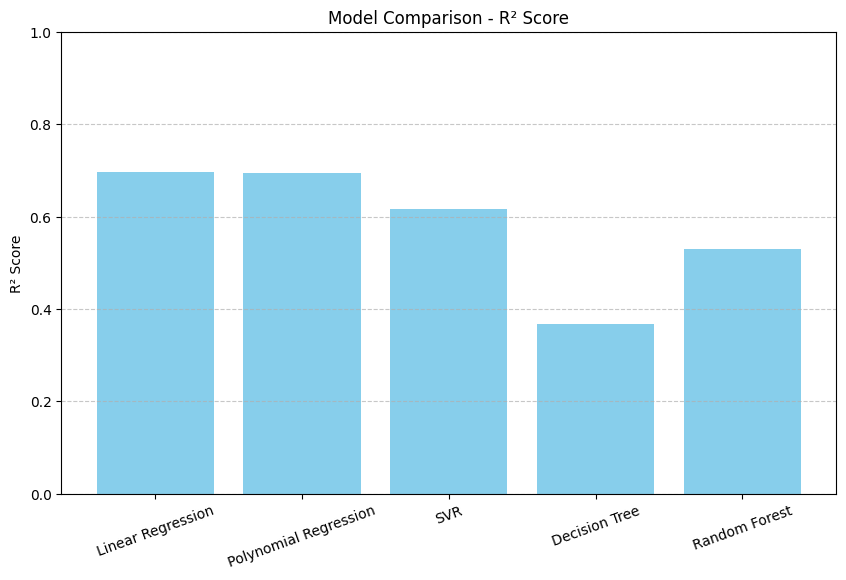

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Replace with your real dataset
# Example dummy data
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=300, n_features=1, noise=20, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# 1. Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Linear Regression'] = r2_score(y_test, y_pred_lr)

# 2. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
results['Polynomial Regression'] = r2_score(y_test, y_pred_poly)

# 3. Support Vector Regression
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)
y_pred_svr_scaled = svr.predict(sc_X.transform(X_test))
y_pred_svr = sc_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()
results['SVR'] = r2_score(y_test, y_pred_svr)

# 4. Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = r2_score(y_test, y_pred_dt)

# 5. Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = r2_score(y_test, y_pred_rf)

# 🔍 View results
for model, score in results.items():
    print(f"{model}: R² Score = {score:.4f}")

# 📊 Visualization
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
